# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [2]:
import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [4]:
print(df_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [5]:
print(df_data.shape)

(150, 4)


1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [6]:
print(df_data.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


1.4. `df_data` に欠損値がないかを確認しましょう。

In [7]:
print(df_data.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [12]:
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])
random_sample_indices = [114, 62, 33, 107, 7, 100, 40, 86, 76, 71]
random_sample = df_target.loc[random_sample_indices]
print(random_sample)

     target
114       2
62        1
33        0
107       2
7         0
100       2
40        0
86        1
76        1
71        1


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

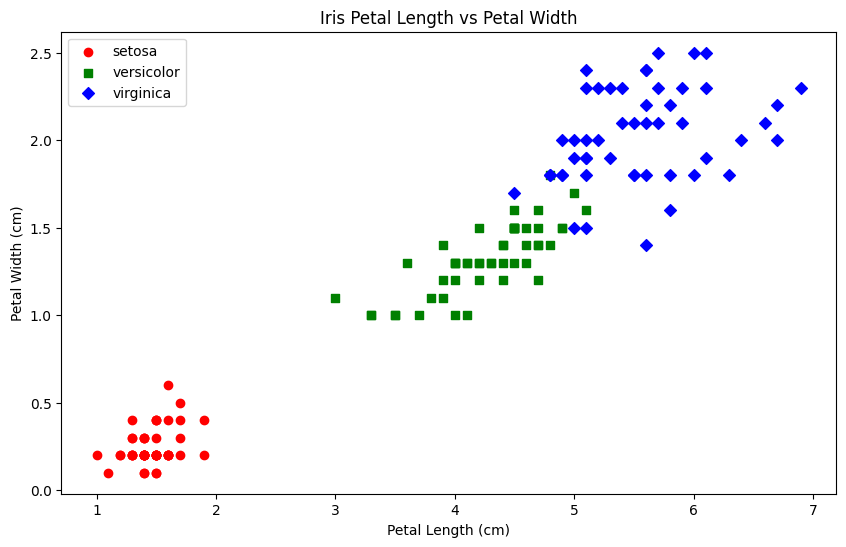

In [17]:
import matplotlib.pyplot as plt
# df_dataとdf_targetを結合
df = pd.concat([df_data, df_target], axis=1)

# 色とマーカーを目的変数に応じて設定
colors = {0: 'red', 1: 'green', 2: 'blue'}  # 修正された色の設定
markers = {0: 'o', 1: 's', 2: 'D'}

# 散布図の作成
plt.figure(figsize=(10, 6))
for target_value in df['target'].unique():
    subset = df[df['target'] == target_value]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                color=colors[target_value], marker=markers[target_value],
                label=target_names[target_value])

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Petal Length vs Petal Width')
plt.legend()
plt.show()

## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [20]:
# 説明変数と目的変数を取得
X = iris.data
y = iris.target

# データを学習用とテスト用に分割（80%を学習データ、20%をテストデータ）
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.2. 本当に4:1に分割できているか確認しましょう。

In [21]:
# 形状を出力
print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.reshape(-1, 1).shape)
print("y_test : ", y_test.reshape(-1, 1).shape)

x_train :  (120, 4)
x_test :  (30, 4)
y_train :  (120, 1)
y_test :  (30, 1)


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [22]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestのインスタンスを生成
rf_model = RandomForestClassifier()


5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [24]:
# モデルを学習させる
rf_model.fit(x_train, y_train)

RandomForestClassifier()

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [25]:
# x_testを使用して予測を行う
predictions = rf_model.predict(x_test)

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [26]:
from sklearn.metrics import accuracy_score

# 予測結果とy_testを使用してaccuracyを計算する
accuracy = accuracy_score(y_test, predictions)

# 結果を出力する
print(accuracy)

1.0


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。